<a href="https://colab.research.google.com/github/RAGISHIVANAND/DEEP_LEARNING/blob/main/KERAS_ANN_(CATEGORICAL_CROSS_ENTROPY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation,Dense
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

#reshaping x data : (n,28,28)=>(n,784)
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

11490434/11490434 [==============================] - 1s 0us/step
60000
28
28


In [3]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#use only 33% of training data to expedite the training process

x_train,_,y_train,_=train_test_split(x_train,y_train,test_size=0.67,random_state=7)

In [4]:
model = Sequential()

model.add(Dense(50,input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
#sgd=SGD(lr=0.001)

#model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
#history=model.fit(x_train,y_train,validation_split=0.3,epochs=100,verbose=0)

In [6]:
sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.3, epochs=100, verbose=0)


In [7]:
results = model.evaluate(x_test,y_test)
print('Test accuracy:',results[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.2767 - accuracy: 0.1290
Test accuracy: 0.1289999932050705


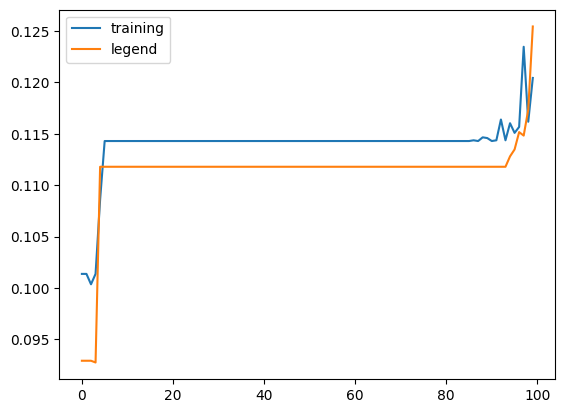

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','legend'],loc='upper left')
plt.show()